In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
df=pd.read_csv('police.csv', encoding='unicode_escape')

In [126]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [127]:
df.shape

(65535, 15)

In [131]:
df.isnull().sum()

stop_date                0
stop_time                0
driver_gender         4061
driver_age_raw        4054
driver_age            4307
driver_race           4060
violation_raw         4060
violation             4060
search_conducted         0
stop_outcome          4060
is_arrested           4060
stop_duration         4060
drugs_related_stop       0
dtype: int64

In [130]:
df.drop('search_type',inplace=True,axis=1)

In [132]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

In [133]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [136]:
df['violation'].unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [149]:
df[df['violation']=='Speeding'].driver_gender.value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

In [150]:
df[df['violation']=='Speeding'].is_arrested.value_counts()

False    36656
True       548
Name: is_arrested, dtype: int64

In [153]:
df[df['violation']=='Equipment'].driver_gender.value_counts()

M    5120
F    1396
Name: driver_gender, dtype: int64

In [155]:
df[df['search_conducted']].driver_gender.value_counts()

M    2113
F     366
Name: driver_gender, dtype: int64

In [156]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

In [158]:
df['stop_duration']

0         0-15 Min
1         0-15 Min
2         0-15 Min
3        16-30 Min
4         0-15 Min
           ...    
65530     0-15 Min
65531     0-15 Min
65532     0-15 Min
65533          NaN
65534     0-15 Min
Name: stop_duration, Length: 65535, dtype: object

In [159]:
df['stop_duration'].value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [162]:
df['stop_duration']=df['stop_duration'].map({'0-15 Min': 7.5,'16-30 Min': 24,'30+ Min': 45})

In [176]:
df['stop_duration'].value_counts()

7.5     47202
24.0    11377
45.0     2642
Name: stop_duration, dtype: int64

In [177]:
df['stop_duration'].mean()

12.184593521830744

In [178]:
df['violation'].unique()

array(['Speeding', 'Other', 'Equipment', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [180]:
df['driver_age'].unique()

array([20, 40, 33, 19, 21, 23, 36, 35, 26, 39, 50, 47, 52, 38, 41, 28, 46,
       32, 58, 27, 43, 24, 17, 22, 44, 48, 34, 55, 51, 45, 29, 31, 37, 67,
       25, 42, 30, 18, 57, 49, 61, 70, 53, 60, 59, 64, 63, 54, 56, 66, 62,
       69, 81, 68, 76, 75, 74, 82, 65, 72, 16, 77, 73, 71, 80, 79, 78, 88,
       15, 83, 86, 84, 85])

In [183]:
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11875.0,36.735158,13.258168,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37119.0,33.262803,12.615878,15.0,23.0,30.0,42.0,88.0


In [185]:
df=pd.read_csv('covid_19.csv', encoding='unicode_escape')

In [186]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [187]:
df.shape

(321, 6)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [189]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [190]:
df['State'].unique()

array([nan, 'Alabama', 'Alaska', 'Alberta', 'Anguilla', 'Anhui',
       'Arizona', 'Arkansas', 'Aruba', 'Australian Capital Territory',
       'Beijing', 'Bermuda', 'Bonaire, Sint Eustatius and Saba',
       'British Columbia', 'British Virgin Islands', 'California',
       'Cayman Islands', 'Channel Islands', 'Chongqing', 'Colorado',
       'Connecticut', 'Curacao', 'Delaware',
       'Diamond Princess cruise ship', 'District of Columbia',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'Florida',
       'French Guiana', 'French Polynesia', 'Fujian', 'Gansu', 'Georgia',
       'Gibraltar', 'Grand Princess', 'Greenland', 'Guadeloupe', 'Guam',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hawaii', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Idaho',
       'Illinois', 'Indiana', 'Inner Mongolia', 'Iowa', 'Isle of Man',
       'Jiangsu', 'Jiangxi', 'Jilin', 'Kansas', 'Kentucky', 'Liaoning',
       'Louisiana', 'Macau', 'Maine', 'Manitoba', 'Marti

In [191]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

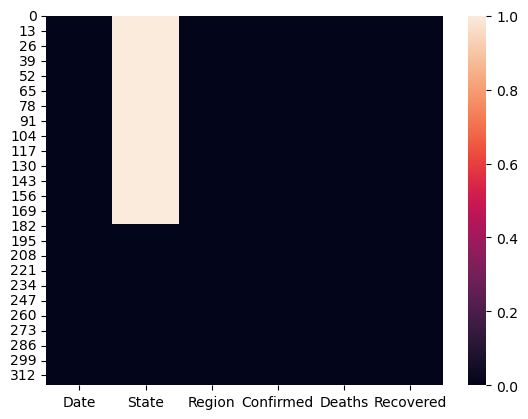

In [199]:
sns.heatmap(df.isnull())
plt.show()

In [198]:
{features for features in df if df[features].isnull().sum()>0}

{'State'}

In [200]:
df.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [215]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

In [216]:
df.groupby('Region')['Confirmed','Deaths'].sum().head(20)

C:\Users\admin\AppData\Local\Temp\ipykernel_3420\2495168946.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Confirmed','Deaths'].sum().head(20)


,Confirmed,Deaths
Region,,
Afghanistan,1939,60
Albania,766,30
Algeria,3848,444
Andorra,743,42
Angola,27,2
Antigua and Barbuda,24,3
Argentina,4285,214
Armenia,1932,30
Australia,6752,91


In [217]:
df.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [220]:
df[df['Confirmed']<10].value_counts()

Date       State                             Region          Confirmed  Deaths  Recovered
4/29/2020  Anguilla                          UK              3          0       3            1
           Bonaire, Sint Eustatius and Saba  Netherlands     5          0       0            1
           British Virgin Islands            UK              6          1       3            1
           Diamond Princess cruise ship      Canada          0          1       0            1
           Northwest Territories             Canada          5          0       0            1
           Recovered                         Canada          0          0       20327        1
                                             US              0          0       120720       1
           Saint Barthelemy                  France          6          0       6            1
           Saint Pierre and Miquelon         France          1          0       0            1
           Tibet                             Mainland C

In [229]:
df=df[~(df['Confirmed']<10)]

In [230]:
df.shape

(304, 6)

In [231]:
df.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [238]:
df.groupby('Region').Confirmed.sum().sort_values(ascending=False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Name: Confirmed, dtype: int64

In [242]:
df.groupby('Region').Deaths.sum().sort_values(ascending=True).head(50)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

In [243]:
df.columns

Index(['Date', 'State', 'Region', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [246]:
df[df['Region']=='India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


In [257]:
df.sort_values('Confirmed',ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


In [258]:
df.sort_values('Recovered',ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,4/29/2020,Nevada,US,4934,230,0
257,4/29/2020,Nebraska,US,3851,56,0
255,4/29/2020,Montana,US,451,16,0
254,4/29/2020,Missouri,US,7660,338,0


In [341]:
df=pd.read_csv('london_housing.csv', encoding='unicode_escape')

In [342]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [343]:
df.shape

(13549, 6)

In [262]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [268]:
df[df['no_of_crimes'].isnull()]

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


In [269]:
df.dropna(inplace=True,axis=0)

In [270]:
df.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
dtype: int64

In [278]:
df['date'].dtypes

dtype('O')

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7375 entries, 72 to 9935
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           7375 non-null   object 
 1   area           7375 non-null   object 
 2   average_price  7375 non-null   int64  
 3   code           7375 non-null   object 
 4   houses_sold    7375 non-null   float64
 5   no_of_crimes   7375 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 403.3+ KB


In [279]:
df.date.dtypes

dtype('O')

In [280]:
df['date']=pd.to_datetime(df['date'])

In [281]:
df['date'].dtypes

dtype('<M8[ns]')

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7375 entries, 72 to 9935
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           7375 non-null   datetime64[ns]
 1   area           7375 non-null   object        
 2   average_price  7375 non-null   int64         
 3   code           7375 non-null   object        
 4   houses_sold    7375 non-null   float64       
 5   no_of_crimes   7375 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 403.3+ KB


In [283]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0


In [284]:
df['date'].unique()

array(['2001-01-01T00:00:00.000000000', '2001-02-01T00:00:00.000000000',
       '2001-03-01T00:00:00.000000000', '2001-04-01T00:00:00.000000000',
       '2001-05-01T00:00:00.000000000', '2001-06-01T00:00:00.000000000',
       '2001-07-01T00:00:00.000000000', '2001-08-01T00:00:00.000000000',
       '2001-09-01T00:00:00.000000000', '2001-10-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2002-02-01T00:00:00.000000000',
       '2002-03-01T00:00:00.000000000', '2002-04-01T00:00:00.000000000',
       '2002-05-01T00:00:00.000000000', '2002-06-01T00:00:00.000000000',
       '2002-07-01T00:00:00.000000000', '2002-08-01T00:00:00.000000000',
       '2002-09-01T00:00:00.000000000', '2002-10-01T00:00:00.000000000',
       '2002-11-01T00:00:00.000000000', '2002-12-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2003-02-01T00:00:00.000000000',
       '2003-03-01T00:00:00.000000000', '2003-04-01

In [285]:
df['Year']=df['date'].dt.year

In [286]:
df['Year']

72      2001
73      2001
74      2001
75      2001
76      2001
        ... 
9931    2019
9932    2019
9933    2019
9934    2019
9935    2019
Name: Year, Length: 7375, dtype: int64

In [287]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Year
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,2001
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,2001
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,2001
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,2001
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,2001


In [288]:
df['Month']=df['date'].dt.month

In [289]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Year,Month
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,2001,1
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,2001,2
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,2001,3
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,2001,4
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,2001,5


In [293]:
df.drop('Year',inplace=True,axis=1)

In [294]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0


In [296]:
df[df['no_of_crimes']==0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [297]:
len(df[df['no_of_crimes']==0])

104

In [298]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes'], dtype='object')

In [299]:
df['average_price'].unique()

array([284262, 198137, 189033, ..., 925955, 927864, 955615], dtype=int64)

In [301]:
df['Year']=df['date'].dt.year

In [302]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,Year
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,2001
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,2001
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,2001
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,2001
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,2001


In [309]:
df1=df[df['area']=='city of london']

In [310]:
df1.groupby('Year').average_price.min()

Year
2001    189033
2002    227281
2003    243184
2004    269514
2005    282866
2006    304977
2007    360923
2008    382571
2009    345338
2010    464436
Name: average_price, dtype: int64

In [311]:
df1

,date,area,average_price,code,houses_sold,no_of_crimes,Year
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,2001
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,2001
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,2001
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,2001
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,2001
...,...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0,2009
179,2009-12-01,city of london,411955,E09000001,16.0,0.0,2009
180,2010-01-01,city of london,464436,E09000001,20.0,0.0,2010
181,2010-02-01,city of london,490525,E09000001,9.0,0.0,2010


In [314]:
df1=df[df['area']=='city of london']

In [315]:
df1

,date,area,average_price,code,houses_sold,no_of_crimes,Year
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,2001
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,2001
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,2001
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,2001
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,2001
...,...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0,2009
179,2009-12-01,city of london,411955,E09000001,16.0,0.0,2009
180,2010-01-01,city of london,464436,E09000001,20.0,0.0,2010
181,2010-02-01,city of london,490525,E09000001,9.0,0.0,2010


In [319]:
df1.groupby('Year').average_price.min()

Year
2001    189033
2002    227281
2003    243184
2004    269514
2005    282866
2006    304977
2007    360923
2008    382571
2009    345338
2010    464436
Name: average_price, dtype: int64

In [325]:
df.groupby('area').no_of_crimes.max().reset_index()

,area,no_of_crimes
0,barking and dagenham,2049.0
1,barnet,2893.0
2,bexley,1914.0
3,brent,2937.0
4,bromley,2637.0
5,camden,4558.0
6,city of london,10.0
7,croydon,3263.0
8,ealing,3401.0
9,enfield,2798.0


In [326]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'Year'],
      dtype='object')

In [348]:
df[df['average_price']<100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              

In [349]:
df=pd.read_csv('Census_2011.csv', encoding='unicode_escape')

In [350]:
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [351]:
df.shape

(640, 25)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   District_code         640 non-null    int64 
 1   State_name            640 non-null    object
 2   District_name         640 non-null    object
 3   Population            640 non-null    int64 
 4   Male                  640 non-null    int64 
 5   Female                640 non-null    int64 
 6   Literate              640 non-null    int64 
 7   Workers               640 non-null    int64 
 8   Male_Workers          640 non-null    int64 
 9   Female_Workers        640 non-null    int64 
 10  Cultivator_Workers    640 non-null    int64 
 11  Agricultural_Workers  640 non-null    int64 
 12  Household_Workers     640 non-null    int64 
 13  Hindus                640 non-null    int64 
 14  Muslims               640 non-null    int64 
 15  Christians            640 non-null    in

<AxesSubplot:>

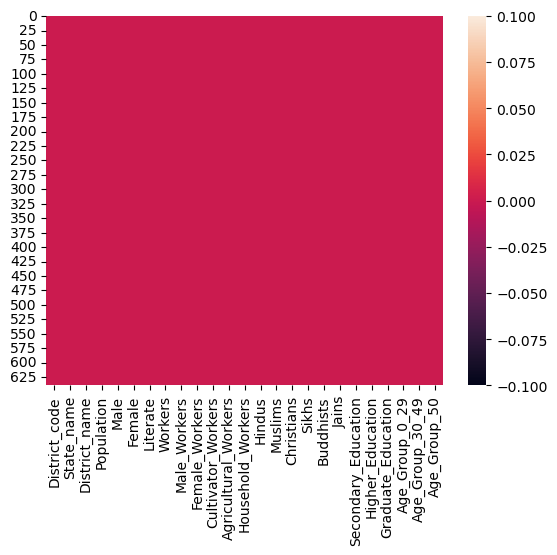

In [353]:
sns.heatmap(df.isnull())

In [357]:
{features for features in df if df[features].isnull().sum()>0}

set()

In [358]:
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [360]:
df.style.hide_index()

C:\Users\admin\AppData\Local\Temp\ipykernel_3420\496160328.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df.style.hide_index()


District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


In [362]:
df.style.set_caption('Indian census 2011 Dataset')

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,Household_Workers,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,7946,37128,823286,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,29102,10110,736054,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,1020,22882,19057,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,1222,10341,108239,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,3930,32604,431279,958,11188,83,10,46062,29517,13962,304979,109818,61334
5,6,JAMMU AND KASHMIR,Rajouri,642415,345351,297064,364109,290912,184752,106160,136527,24016,4656,221880,402879,983,15513,189,26,65921,35804,18576,404903,153165,83319
6,7,JAMMU AND KASHMIR,Kathua,616435,326109,290326,389204,200431,161548,38883,69533,21566,3952,540063,64234,1828,9551,24,16,91522,47694,24330,357864,160123,97684
7,8,JAMMU AND KASHMIR,Baramula,1008039,534733,473306,545149,304200,249581,54619,57495,62246,15084,30621,959185,1497,14770,140,29,107837,57932,48285,636524,239659,130513
8,9,JAMMU AND KASHMIR,Bandipore,392232,207680,184552,185979,149317,101380,47937,28232,32882,20484,8439,382006,572,555,44,17,35630,18644,12721,252378,90465,48802
9,10,JAMMU AND KASHMIR,Srinagar,1236829,651124,585705,748584,407188,333151,74037,12228,10408,20095,42540,1177342,2746,12187,285,74,176409,132727,121856,693238,351561,190330


In [363]:
df['District_name'].unique()

array(['Kupwara', 'Badgam', 'Leh(Ladakh)', 'Kargil', 'Punch', 'Rajouri',
       'Kathua', 'Baramula', 'Bandipore', 'Srinagar', 'Ganderbal',
       'Pulwama', 'Shupiyan', 'Anantnag', 'Kulgam', 'Doda', 'Ramban',
       'Kishtwar', 'Udhampur', 'Reasi', 'Jammu', 'Samba', 'Chamba',
       'Kangra', 'Lahul AND Spiti', 'Kullu', 'Mandi', 'Hamirpur', 'Una',
       'Bilaspur', 'Solan', 'Sirmaur', 'Shimla', 'Kinnaur', 'Gurdaspur',
       'Kapurthala', 'Jalandhar', 'Hoshiarpur',
       'Shahid Bhagat Singh Nagar', 'Fatehgarh Sahib', 'Ludhiana', 'Moga',
       'Firozpur', 'Muktsar', 'Faridkot', 'Bathinda', 'Mansa', 'Patiala',
       'Amritsar', 'Tarn Taran', 'Rupnagar', 'Sahibzada Ajit Singh Nagar',
       'Sangrur', 'Barnala', 'Chandigarh', 'Uttarkashi', 'Chamoli',
       'Rudraprayag', 'Tehri Garhwal', 'Dehradun', 'Garhwal',
       'Pithoragarh', 'Bageshwar', 'Almora', 'Champawat', 'Nainital',
       'Udham Singh Nagar', 'Hardwar', 'Panchkula', 'Ambala',
       'Yamunanagar', 'Kurukshetra', 'Kait

In [372]:
df[df['District_name'].isin(['New Delhi','Lucknow','Jaipur'])]

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
93,94,NCT OF DELHI,New Delhi,142004,77942,64062,114179,59541,46940,12601,...,4852,2933,312,679,15942,17742,23934,76076,43913,21773
109,110,RAJASTHAN,Jaipur,6626178,3468507,3157671,4300965,2464893,1714947,749946,...,12708,18782,1020,81079,659389,455527,703673,4091148,1646480,884057
156,157,UTTAR PRADESH,Lucknow,4589838,2394476,2195362,3127260,1542806,1226399,316407,...,20493,23883,3877,4975,428121,378742,639260,2678289,1161686,685258


In [373]:
df.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [374]:
df['State_name'].unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ORISSA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN AND DIU',
       'DADRA AND NAGAR HAVELI', 'MAHARASHTRA', 'ANDHRA PRADESH',
       'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA', 'TAMIL NADU',
       'PONDICHERRY', 'ANDAMAN AND NICOBAR ISLANDS'], dtype=object)

In [375]:
df[df['State_name'].isin(['WEST BENGAL','TAMIL NADU'])]

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
326,327,WEST BENGAL,Darjiling,1846823,937259,909564,1315585,683726,479586,204140,...,141848,2032,209240,1840,176129,113905,110193,1031221,523288,289979
327,328,WEST BENGAL,Jalpaiguri,3872846,1983064,1889782,2498780,1512910,1091361,421549,...,186279,2994,50676,1461,292056,150360,129393,2259507,1035449,575667
328,329,WEST BENGAL,Koch Bihar,2819086,1451542,1367544,1850504,1127977,845308,282669,...,4122,449,445,1869,209153,93119,81100,1623320,744646,448761
329,330,WEST BENGAL,Uttar Dinajpur,3007134,1551066,1456068,1489667,1075626,799627,275999,...,16702,477,432,1324,163106,73395,59457,1916033,704859,385155
330,331,WEST BENGAL,Dakshin Dinajpur,1676276,857199,819077,1083685,702987,499560,203427,...,24794,276,148,323,135556,63286,52345,937283,465982,271423
331,332,WEST BENGAL,Maldah,3988845,2051541,1937304,2086432,1537847,1086461,451386,...,13209,747,359,639,238078,109719,92207,2511004,955283,520122
332,333,WEST BENGAL,Murshidabad,7103807,3627564,3476243,4055834,2589907,1985667,604240,...,18102,766,348,3037,443254,230242,170051,4390564,1717594,991413
333,334,WEST BENGAL,Birbhum,3502404,1790920,1711484,2158447,1331603,1029770,301833,...,10906,582,258,1152,245201,122865,115743,2008655,952059,539463
334,335,WEST BENGAL,Barddhaman,7717563,3966889,3750674,5247208,2911251,2293083,618168,...,21220,16675,1602,1674,698251,405935,439823,4149420,2265543,1292913
335,336,WEST BENGAL,Nadia,5167600,2653768,2513832,3480555,1842607,1554090,288517,...,33835,849,514,281,412193,236828,209562,2745828,1484986,934417


In [376]:
df.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [378]:
df['State_name'].unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ORISSA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN AND DIU',
       'DADRA AND NAGAR HAVELI', 'MAHARASHTRA', 'ANDHRA PRADESH',
       'KARNATAKA', 'GOA', 'LAKSHADWEEP', 'KERALA', 'TAMIL NADU',
       'PONDICHERRY', 'ANDAMAN AND NICOBAR ISLANDS'], dtype=object)

In [385]:
df.groupby('State_name').Population.sum()

State_name
ANDAMAN AND NICOBAR ISLANDS       380581
ANDHRA PRADESH                  84580777
ARUNACHAL PRADESH                1383727
ASSAM                           31205576
BIHAR                          104099452
CHANDIGARH                       1055450
CHHATTISGARH                    25545198
DADRA AND NAGAR HAVELI            343709
DAMAN AND DIU                     243247
GOA                              1458545
GUJARAT                         60439692
HARYANA                         25351462
HIMACHAL PRADESH                 6864602
JAMMU AND KASHMIR               12541302
JHARKHAND                       32988134
KARNATAKA                       61095297
KERALA                          33406061
LAKSHADWEEP                        64473
MADHYA PRADESH                  72626809
MAHARASHTRA                    112374333
MANIPUR                          2855794
MEGHALAYA                        2966889
MIZORAM                          1097206
NAGALAND                         1978502
NCT O

In [386]:
df.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

In [392]:
df.groupby(['State_name'])['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains'].sum()

C:\Users\admin\AppData\Local\Temp\ipykernel_3420\3188884163.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['State_name'])['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains'].sum()


,Hindus,Muslims,Christians,Sikhs,Buddhists,Jains
State_name,,,,,,
ANDAMAN AND NICOBAR ISLANDS,264296,32413,80984,1286,338,31
ANDHRA PRADESH,74824149,8082412,1129784,40244,36692,53849
ARUNACHAL PRADESH,401876,27045,418732,3287,162815,771
ASSAM,19180759,10679345,1165867,20672,54993,25949
BIHAR,86078686,17557809,129247,23779,25453,18914
CHANDIGARH,852574,51447,8720,138329,1160,1960
CHHATTISGARH,23819789,514998,490542,70036,70467,61510
DADRA AND NAGAR HAVELI,322857,12922,5113,217,634,1186
DAMAN AND DIU,220150,19277,2820,172,217,287


In [393]:
df.head()

,District_code,State_name,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,229064,190899,38165,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,214866,162578,52288,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,51873,39839,12034,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,161393,117677,43716,...,958,11188,83,10,46062,29517,13962,304979,109818,61334


In [395]:
df[df['State_name']=='MAHARASHTRA'].Male_Workers.sum()

32616875

In [399]:
df=df.set_index('District_code')

In [400]:
df

,District_name,Population,Male,Female,Literate,Workers,Male_Workers,Female_Workers,Cultivator_Workers,Agricultural_Workers,...,Christians,Sikhs,Buddhists,Jains,Secondary_Education,Higher_Education,Graduate_Education,Age_Group_0_29,Age_Group_30_49,Age_Group_50
District_code,,,,,,,,,,,,,,,,,,,,,
1,Kupwara,870354,474190,396164,439654,229064,190899,38165,34680,56759,...,1700,5600,66,39,74948,39709,21751,600759,178435,89679
2,Badgam,753745,398041,355704,335649,214866,162578,52288,55299,36630,...,1489,5559,47,6,66459,41367,27950,503223,160933,88978
3,Leh(Ladakh),133487,78971,54516,93770,75079,53265,21814,20869,1645,...,658,1092,88635,103,16265,8923,6197,70703,41515,21019
4,Kargil,140802,77785,63017,86236,51873,39839,12034,8266,3763,...,604,1171,20126,28,16938,9826,3077,87532,35561,17488
5,Punch,476835,251899,224936,261724,161393,117677,43716,54264,31583,...,958,11188,83,10,46062,29517,13962,304979,109818,61334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Mahe,41816,19143,22673,36470,11802,9093,2709,43,82,...,958,3,21,14,8773,5711,4475,19760,12543,9428
637,Karaikal,200222,97809,102413,154916,68301,53139,15162,2372,13077,...,18391,46,63,54,29456,15930,18998,102333,60089,37434
638,Nicobars,36842,20727,16115,25332,17125,12714,4411,322,242,...,26077,343,119,0,6325,3668,1300,18786,12088,5922


In [401]:
df=pd.read_csv('udemy_course.csv', encoding='unicode_escape')

In [402]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [403]:
df.shape

(3682, 11)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [405]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [410]:
df['subject'].unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

In [414]:
df['subject'].value_counts().reset_index()

,index,subject
0,Web Development,1200
1,Business Finance,1199
2,Musical Instruments,680
3,Graphic Design,603


In [415]:
df.head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [417]:
df[df['is_paid']==False]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13T21:51:59Z,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development
74,1214144,Â¡Triunfar en La Bolsa de Valores No Requiere ...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30T14:30:12Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3620,552598,WordPress in under an hour - Create/manage you...,False,Free,6474,86,15,All Levels,1 hour,2015-07-15T00:21:56Z,Web Development
3638,1068590,Wordpress Website Mastery 2017,False,Free,5181,64,22,Beginner Level,2.5 hours,2017-01-18T17:01:40Z,Web Development
3652,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,Free,13016,286,15,All Levels,1.5 hours,2016-03-03T17:45:31Z,Web Development
3674,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,Free,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z,Musical Instruments


In [420]:
df[df['is_paid']==True]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26T20:48:48Z,Business Finance
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development


In [421]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [462]:
df[df['num_subscribers']==268923]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development


In [465]:
df.sort_values('num_subscribers',ascending=True).head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
649,1233314,Building a Balanced Scorecard,True,50,0,0,11,Intermediate Level,2 hours,2017-07-03T21:38:22Z,Business Finance
3259,1232282,The Cash Flow Statement - An Introduction,True,50,0,0,10,Beginner Level,1.5 hours,2017-06-28T16:05:51Z,Business Finance
3261,1275872,The Complete Adobe Spark Course,True,150,0,0,29,All Levels,2 hours,2017-07-03T17:39:57Z,Graphic Design
910,726314,Create Beautiful Image Maps for Your Website,True,20,0,0,8,Intermediate Level,37 mins,2016-01-18T17:56:36Z,Graphic Design
3328,715476,The Cuckoo Strategy to get European Funding,True,160,0,0,6,All Levels,1 hour,2016-01-06T02:38:23Z,Business Finance


In [466]:
df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [467]:
df['subject'].value_counts()

Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [494]:
df[(df['subject']=='Graphic Design') & (df['price']<'100')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [495]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [499]:
df[df['subject']=='Web Development']

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
11,64605,1 Hour CSS,True,100,18324,333,16,Beginner Level,1 hour,2013-07-09T20:27:14Z,Web Development
12,64422,1 Hour HTML,True,200,16212,514,20,Beginner Level,1 hour,2013-07-09T03:16:26Z,Web Development
13,63612,1 Hour JavaScript,True,200,22999,602,18,Beginner Level,1 hour,2013-07-04T15:27:02Z,Web Development
14,72262,1 hour jQuery,True,100,5456,133,25,Beginner Level,1 hour,2013-08-03T14:20:52Z,Web Development
24,975916,17 Complete JavaScript projects explained st...,True,185,327,26,106,Beginner Level,9.5 hours,2016-10-26T14:03:38Z,Web Development
...,...,...,...,...,...,...,...,...,...,...,...
3666,969170,XSD :basics for beginners,True,35,755,0,7,All Levels,42 mins,2016-09-27T18:01:26Z,Web Development
3667,968278,XSLT :basics for beginners,True,35,877,6,7,All Levels,32 mins,2016-09-27T15:14:59Z,Web Development
3670,560996,You can create Incredible Websites with HTML C...,True,100,11892,50,28,All Levels,2.5 hours,2015-09-12T01:35:41Z,Web Development
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development


In [507]:
df[df.course_title.str.contains('Python')].head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
216,599504,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,14 hours,2016-08-11T22:09:24Z,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08T00:46:14Z,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08T20:57:35Z,Web Development
842,186096,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,26 hours,2014-05-29T00:58:43Z,Web Development
1400,394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2 hours,2015-06-09T19:51:50Z,Web Development


In [506]:
len(df[df.course_title.str.contains('Python')])

29

In [513]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments


In [518]:
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

In [519]:
df['published_timestamp'].dtypes

datetime64[ns, UTC]

In [520]:
df['year']=df['published_timestamp'].dt.year

In [521]:
df.head(1)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014


In [530]:
df[df['year']==2015]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
10,591880,1 - Concepts of Statistics For Beginners Step ...,True,200,273,4,15,Beginner Level,31 mins,2015-08-30 22:48:34+00:00,Business Finance,2015
16,302450,10 Numbers Every Business Owner Should Know,True,20,13,1,9,All Levels,1 hour,2015-03-08 19:11:24+00:00,Business Finance,2015
19,384928,101 Blues riffs - learn how the harmonica supe...,True,200,1350,65,55,Intermediate Level,6.5 hours,2015-01-04 21:14:31+00:00,Musical Instruments,2015
23,550842,16 Guitar Chords to Jam With - (Beginner - Int...,True,20,1224,19,20,Beginner Level,1 hour,2015-07-10 19:53:56+00:00,Musical Instruments,2015
26,486240,2 Easy Steps To Investment And Avoiding Traps,True,20,828,1,20,All Levels,1 hour,2015-04-27 23:18:59+00:00,Business Finance,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,551170,Your First Course on Piano,True,70,2002,34,33,Beginner Level,4 hours,2015-07-16 17:07:49+00:00,Musical Instruments,2015
3676,498488,Your First Successful Forex Trades - With Case...,True,200,1079,34,16,All Levels,2.5 hours,2015-05-26 20:48:48+00:00,Business Finance,2015
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development,2015
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments,2015


In [531]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,2017
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,2017


In [543]:
df.groupby('level').num_subscribers.max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

In [544]:
df=pd.read_csv('netflix.csv', encoding='unicode_escape')

In [545]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [546]:
df.shape

(7789, 11)

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [548]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

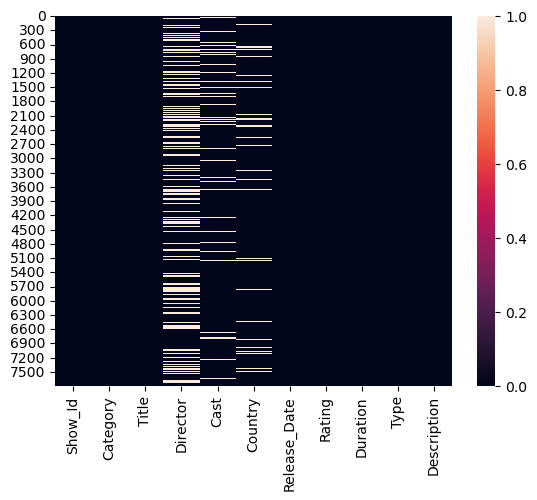

In [549]:
sns.heatmap(df.isnull())

In [551]:
df.size

85679

In [554]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [556]:
df.drop_duplicates(inplace=True)

In [557]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [558]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [571]:
df[df['Release_Date'].isnull()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Ã...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason SaldaÃ±a, Gustavo Sorola, ...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6066,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [572]:
df['Release_Date']

0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7784      October 19, 2020
7785         March 2, 2019
7786    September 25, 2020
7787      October 31, 2020
7788         March 1, 2020
Name: Release_Date, Length: 7787, dtype: object

In [573]:
df.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [577]:
df[df['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [579]:
df[df['Title'].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [580]:
df['Release_Date'].dtypes

dtype('O')

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5399 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7780 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB


In [583]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [584]:
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [585]:
df['Year']=df['Release_Date'].dt.year

In [589]:
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


<AxesSubplot:>

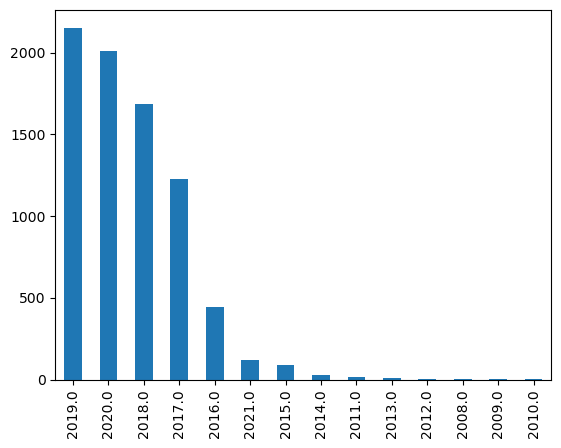

In [607]:
df['Year'].value_counts().plot(kind='bar')

In [612]:
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [615]:
df.groupby('Category').count()

,Show_Id,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
Category,,,,,,,,,,,
Movie,5377,5377,5214,4951,5147,5377,5372,5377,5377,5377,5377
TV Show,2410,2410,185,2118,2133,2400,2408,2410,2410,2410,2400


<AxesSubplot:xlabel='Category', ylabel='count'>

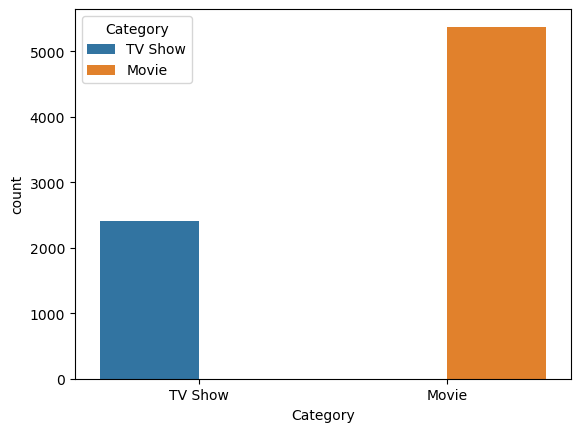

In [619]:
sns.countplot(data=df,x='Category',hue='Category')

In [626]:
df[(df['Year']==2020) & (df['Category']=='Movie')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020.0
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,2020-09-08,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020.0
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,2020-07-01,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,2020-05-19,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,2020.0
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020.0


In [636]:
df[(df['Country']=='India') & (df['Category']=='TV Show')].Title.reset_index()

,index,Title
0,86,21 Sarfarosh: Saragarhi 1897
1,132,7 (Seven)
2,340,Agent Raghav
3,364,AkbarÂ Birbal
4,533,Anjaan: Rural Myths
...,...,...
66,6249,The Creative Indians
67,6400,The Golden Years with Javed Akhtar
68,6469,The House That Made Me
69,7294,Typewriter


In [643]:
df['Director'].value_counts().head()

RaÃºl Campos, Jan Suter    18
Marcus Raboy               16
Jay Karas                  14
Cathy Garcia-Molina        13
Jay Chapman                12
Name: Director, dtype: int64

In [648]:
df[(df['Category']=='Movie') & (df['Type'].str.contains('Comedies')) ]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019.0
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,2019-06-01,TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ...",2019.0
37,s38,Movie,#Selfie 69,Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,2019-06-01,TV-MA,119 min,"Comedies, Dramas, International Movies","After a painful breakup, a trio of party-lovin...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7766,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,2019-05-21,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,2019.0
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2019-12-15,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019.0
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni GÃ³mez, Elena Anaya, Iria Ca...",Spain,2017-07-01,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the...",2017.0
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0


In [651]:
df.dropna(axis=0,inplace=True)

In [659]:
df[df['Cast'].str.contains('Tom Cruise')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019.0


In [661]:
df['Rating'].value_counts().reset_index()

,index,Rating
0,TV-MA,1666
1,TV-14,1133
2,R,654
3,TV-PG,413
4,PG-13,375
5,PG,238
6,TV-G,80
7,TV-Y,71
8,TV-Y7,69
9,NR,62


In [666]:
df[(df['Rating']=='TV-14') & (df['Country']=='Canada')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019.0
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,2018-12-27,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018.0
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,2018-07-01,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018.0
1687,s1688,TV Show,Degrassi: Next Class,Stefan Brogren,"Amanda Arcuri, Amir Bageria, Soma Bhatia, Jami...",Canada,2017-07-07,TV-14,4 Seasons,"International TV Shows, TV Dramas, Teen TV Shows",Degrassi's next generation of high-tech newbie...,2017.0
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,2017-11-12,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017.0
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-FranÃ§ois Blais,Martin Matte,Canada,2019-10-14,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019.0
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,2017-08-22,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017.0
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,2017-12-01,TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017.0
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,2019-06-18,TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019.0
7041,s7040,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,2020-03-27,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...,2020.0


In [669]:
df[(df['Rating']=='R') & (df['Year']>2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,2020-03-19,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020.0
65,s66,Movie,13 Sins,Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,2019-01-13,R,93 min,"Horror Movies, Thrillers",A man agrees to appear on a game show with a $...,2019.0
68,s69,Movie,14 Blades,Daniel Lee,"Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...","Hong Kong, China, Singapore",2019-04-03,R,113 min,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t...",2019.0
83,s84,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,2019-06-28,R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7659,s7658,Movie,Woodshock,"Kate Mulleavy, Laura Mulleavy","Kirsten Dunst, Joe Cole, Pilou AsbÃ¦k, Jack Ki...",United States,2020-06-21,R,101 min,"Dramas, Independent Movies, Thrillers","Shattered after her mother's death, a woman fl...",2020.0
7712,s7711,Movie,"Yes, God, Yes",Karen Maine,"Natalia Dyer, Timothy Simons, Wolfgang Novogra...",United States,2020-10-22,R,78 min,"Comedies, Dramas, Independent Movies",A devoutly religious teen grapples with her ow...,2020.0
7738,s7737,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,2019.0
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0


In [673]:
df['Duration'].unique()

array(['93 min', '78 min', '80 min', '123 min', '1 Season', '95 min',
       '119 min', '118 min', '143 min', '103 min', '89 min', '91 min',
       '149 min', '144 min', '124 min', '110 min', '128 min', '117 min',
       '100 min', '99 min', '102 min', '104 min', '105 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '87 min', '109 min',
       '101 min', '90 min', '113 min', '114 min', '130 min', '94 min',
       '140 min', '135 min', '82 min', '70 min', '92 min', '164 min',
       '83 min', '116 min', '84 min', '86 min', '120 min', '96 min',
       '126 min', '75 min', '129 min', '77 min', '137 min', '148 min',
       '121 min', '122 min', '176 min', '85 min', '22 min', '68 min',
       '111 min', '29 min', '142 min', '168 min', '59 min', '108 min',
       '44 min', '26 min', '156 min', '98 min', '57 min', '150 min',
       '133 min', '115 min', '154 min', '127 min', '146 min', '136 min',
       '88 min', '131 min', '2 Seasons', '24 min', '112 min', '74 min',
       '

In [674]:
df['Duration'].dtypes

dtype('O')

In [675]:
df[['Minutes', 'Unit']]=df['Duration'].str.split(' ', expand=True)

In [676]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123,min
5,s6,TV Show,46,Serdar Akar,"Erdal BeÅikÃ§ioÄlu, Yasemin Allen, Melis Bir...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,1,Season


In [686]:
df[df['Category']=='TV Show'].Minutes.max()

'9'

In [687]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'Year',
       'Minutes', 'Unit'],
      dtype='object')

In [698]:
df[df['Category']=='TV Show'].groupby('Country').count()

,Show_Id,Category,Title,Director,Cast,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
Country,,,,,,,,,,,,,
Argentina,1,1,1,1,1,1,1,1,1,1,1,1,1
Australia,1,1,1,1,1,1,1,1,1,1,1,1,1
Belgium,1,1,1,1,1,1,1,1,1,1,1,1,1
Brazil,4,4,4,4,4,4,4,4,4,4,4,4,4
Canada,3,3,3,3,3,3,3,3,3,3,3,3,3
"Canada, United Kingdom, United States",1,1,1,1,1,1,1,1,1,1,1,1,1
China,2,2,2,2,2,2,2,2,2,2,2,2,2
Colombia,1,1,1,1,1,1,1,1,1,1,1,1,1
"Colombia, Mexico, United States",1,1,1,1,1,1,1,1,1,1,1,1,1


In [699]:
df[df['Category']=='TV Show'].Country.value_counts().head(1)

United States    27
Name: Country, dtype: int64

In [700]:
df.sort_values(by='Year')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0,81,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0,29,min
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0,104,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0,84,min
3221,s3222,Movie,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,2011-09-27,TV-PG,75 min,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...,2011.0,75,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,s1427,Movie,Cloudy with a Chance of Meatballs,"Phil Lord, Christopher Miller","Bill Hader, Anna Faris, James Caan, Andy Sambe...",United States,2021-01-01,PG,90 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When inventor Flint Lockwood makes clouds rain...,2021.0,90,min
1739,s1740,Movie,Dhobi Ghat (Mumbai Diaries),Kiran Rao,"Aamir Khan, Monica Dogra, Kriti Malhotra, Prat...",India,2021-01-10,TV-MA,102 min,"Dramas, International Movies","In this intimate drama, circumstances draw tog...",2021.0,102,min
7553,s7552,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,2021-01-01,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a...",2021.0,102,min
2479,s2480,Movie,Good Hair,Jeff Stilson,"Chris Rock, Nia Long, Maya Angelou, Ice-T, Eve...",United States,2021-01-01,PG-13,96 min,Documentaries,Chris Rock hops around the world going from be...,2021.0,96,min


In [713]:
df[(df["Category"]=="Movie") & (df["Type"].str.contains("Dramas")) | (df["Category"]=="TV Show") & (df["Type"].str.contains("Kids' TV"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,2019.0,119,min
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,2017.0,103,min
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,2019-09-01,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,2019.0,149,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,158,min
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",2018.0,104,min
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018.0,94,min
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020.0,99,min


In [2]:
df=pd.read_csv('survey.csv',encoding='unicode_escape')

In [3]:
df.head()

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"â¹ 5,000 - â¹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"â¹ 10,000 - â¹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"â¹ 50,000 - â¹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [4]:
survey=pd.read_csv('survey.csv',encoding='unicode_escape')

In [5]:
survey.head()

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"â¹ 5,000 - â¹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"â¹ 10,000 - â¹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"â¹ 50,000 - â¹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [6]:
survey['collection_date'].unique()

array(['5-24-2017', '5-25-2017', '5-26-2017', '5-27-2017', '5-28-2017',
       '5-29-2017', '5-30-2017', '5-31-2017', '6-1-2017'], dtype=object)

In [7]:
survey['collection_date'].nunique()

9

In [8]:
survey['collection_date'].value_counts(ascending=True)

5-31-2017     557
5-30-2017     582
5-26-2017     598
6-1-2017      607
5-29-2017     620
5-27-2017     665
5-28-2017     761
5-25-2017     998
5-24-2017    1479
Name: collection_date, dtype: int64

In [9]:
df.columns

Index(['ï»¿response_id', 'collection_date', 'urban_rural', 'education',
       'income', 'Vote_Now', 'Past_Vote', 'CM_satisfaction',
       'MLA_satisfaction', 'age', 'gender', 'assembly_no', 'category',
       'weight'],
      dtype='object')

In [10]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿response_id    6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   object 
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 751.2+ KB


In [11]:
survey['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [12]:
survey['age'].replace({'24ko':24},inplace=True)

In [13]:
survey['age']=survey['age'].astype(int)

In [14]:
survey[survey['age']<45]

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"â¹ 5,000 - â¹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"â¹ 10,000 - â¹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"â¹ 50,000 - â¹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below â¹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below â¹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,6-1-2017,Urban,Graduate,"â¹ 5,000 - â¹ 10,000",JAP(L),RJD,Canât say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,6-1-2017,Rural,Professional Education,"â¹ 10,000 - â¹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [15]:
survey.insert(10,'age_group',survey['age'])

In [16]:
survey.head()

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"â¹ 5,000 - â¹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"â¹ 10,000 - â¹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"â¹ 50,000 - â¹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505


In [17]:
data1=survey[(survey['age_group']>=18) & (survey['age_group']<25)]

In [18]:
data1['age_group']='18-25'

C:\Users\admin\AppData\Local\Temp\ipykernel_800\2651692129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['age_group']='18-25'


In [19]:
data1.head()

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"â¹ 50,000 - â¹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below â¹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,5-24-2017,Rural,Graduate,"â¹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below â¹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
18,19,5-24-2017,Rural,Graduate,"â¹ 30,000 - â¹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519


In [20]:
data2=survey[(survey['age_group']>=25) & (survey['age_group']<35)]

In [21]:
data2['age_group']='25-35'

C:\Users\admin\AppData\Local\Temp\ipykernel_800\934040825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['age_group']='25-35'


In [22]:
data2.head()

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,25-35,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,25-35,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"â¹ 5,000 - â¹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,25-35,Male,191,Gen,0.673762
6,7,5-24-2017,Urban,Graduate,"BPL/Below â¹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,25-35,Male,172,BC,0.521283
7,8,5-24-2017,Rural,Professional Education,"â¹ 1,50,000 & above",BJP,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,34,25-35,Male,186,ST,0.340652


In [26]:
data3=survey[(survey['age_group']>=35) & (survey['age_group']<45)]

In [27]:
data3['age_group']='35-45'

C:\Users\admin\AppData\Local\Temp\ipykernel_800\3384082299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['age_group']='35-45'


In [28]:
data3.head()

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
3,4,5-24-2017,Urban,Graduate,"â¹ 10,000 - â¹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,35-45,Male,194,Gen,1.101298
5,6,5-24-2017,Urban,Graduate,"â¹ 20,000 - â¹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,35-45,Male,178,Gen,0.382603
10,11,5-24-2017,Urban,12th Pass,"â¹ 5,000 - â¹ 10,000",BJP,BJP,Somewhat Satisfied,Somewhat Dissatisfied,38,35-45,Male,181,EBC,3.850583
11,12,5-24-2017,Urban,Graduate,"â¹ 10,000 - â¹ 20,000",LJP,JD(U),Somewhat Satisfied,Fully Dissatisfied,42,35-45,Male,183,BC,2.824391
17,18,5-24-2017,Urban,Graduate,"â¹ 5,000 - â¹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,39,35-45,Male,200,Gen,0.181242


In [29]:
data4=survey[(survey['age_group']>=45) & (survey['age_group']<55)]

In [30]:
data4['age_group']='45-55'

C:\Users\admin\AppData\Local\Temp\ipykernel_800\3118066753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['age_group']='45-55'


In [31]:
data4.head()

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
12,13,5-24-2017,Urban,Post - Graduation,"â¹ 5,000 - â¹ 10,000",Undecided,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,51,45-55,Male,183,SC,20.558759
33,34,5-24-2017,Urban,Graduate,"â¹ 50,000 - â¹ 80,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,53,45-55,Male,188,Gen,1.936195
59,60,5-24-2017,Rural,12th Pass,"â¹ 5,000 - â¹ 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48,45-55,Male,171,BC,2.824391
66,67,5-24-2017,Urban,Post - Graduation,"â¹ 1,50,000 & above",INC,BJP,Fully Dissatisfied,Fully Dissatisfied,45,45-55,Male,204,Gen,1.261740
78,79,5-24-2017,Urban,Post - Graduation,"â¹ 80,000 - â¹ 1,50,000",NOTA,JD(U),Somewhat Satisfied,Fully Dissatisfied,49,45-55,Male,194,Gen,1.917992


In [32]:
data5=survey[(survey['age_group']>=55)]

In [33]:
data5['age_group']='55+'

C:\Users\admin\AppData\Local\Temp\ipykernel_800\3761592955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['age_group']='55+'


In [34]:
data5.head()

,ï»¿response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
69,70,5-24-2017,Rural,Graduate,"â¹ 30,000 - â¹ 50,000",RJD,INC,Fully Dissatisfied,Fully Satisfied,74,55+,Male,192,ST,1.805903
74,75,5-24-2017,Urban,Graduate,"â¹ 30,000 - â¹ 50,000",BJP,BJP,Somewhat Dissatisfied,Somewhat Satisfied,70,55+,Male,183,BC,0.343147
121,122,5-24-2017,Rural,Graduate,"â¹ 20,000 - â¹ 30,000",NOTA,Did not vote,Somewhat Satisfied,Fully Dissatisfied,58,55+,Male,187,Gen,2.092567
126,127,5-24-2017,Urban,Graduate,"â¹ 80,000 - â¹ 1,50,000",NOTA,BJP,Fully Dissatisfied,Fully Dissatisfied,56,55+,Male,183,Gen,2.092567
183,184,5-24-2017,Rural,Graduate,"â¹ 1,50,000 & above",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,55+,Male,175,BC,2.824391


In [38]:
survey=pd.concat([data1,data2,data3,data4,data5])

In [42]:
survey['age_group'].unique()

array(['18-25', '25-35', '35-45', '45-55', '55+'], dtype=object)

In [46]:
survey['age_group'].value_counts().reset_index()

,index,age_group
0,25-35,3160
1,18-25,2094
2,35-45,1145
3,45-55,340
4,55+,128
